

# > CVD Simulation



Link to CVD simulation paper:
https://www.inf.ufrgs.br/~oliveira/pubs_files/CVD_Simulation/CVD_Simulation.html



In [6]:
from skimage import color, io, util, exposure
from skimage import filters, morphology
from skimage.transform import rescale
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


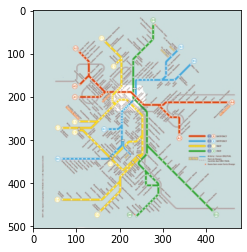

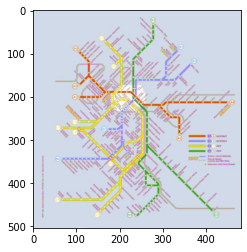

In [22]:
subway_link = 'drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Subway_Vienot_path_only.jpg'
subway_sim_link = 'drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/subway_result.jpg'

subway_img = io.imread(subway_link)
subway_img_sim = io.imread(subway_sim_link)

plt.imshow(subway_img)
plt.show()
plt.imshow(subway_img_sim)
plt.show()

In [7]:
def CVD_filter(image, filter):
    res_image = np.zeros(image.shape, dtype = int)
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            for color in [0, 1, 2]:
                sum = 0
                sum = sum + image[row][col][0] * filter[color][0];
                sum = sum + image[row][col][1] * filter[color][1];
                sum = sum + image[row][col][2] * filter[color][2];
                res_image[row][col][color] = int(sum)
            if image.shape[2] == 4:
                res_image[row][col][3] = 255
    return res_image

In [8]:
protan_100 = [[ 0.152286,  1.052583, -0.204868],
              [ 0.114503,  0.786281,  0.099216],
              [-0.003882, -0.048116,  1.051998]]

protan_060 = [[ 0.385450,  0.769005, -0.154455],
              [ 0.100526,  0.829802,  0.069673],
              [-0.007442, -0.022190,  1.029632]]

deutran_100 = [[ 0.367322,  0.860646, -0.227968],
               [ 0.280085,  0.672501,  0.047413],
               [-0.011820,  0.042940,  0.968881]]

result_0 = CVD_filter(subway_img, protan_100)
result_1 = CVD_filter(subway_img_sim, protan_100)

plt.imshow(result_0)
plt.show()
plt.imshow(result_1)
plt.show()

NameError: ignored

In [9]:
def srgb2lrgb(sRGB):
    res_image = np.zeros(sRGB.shape)
    for row in range(sRGB.shape[0]):
        for col in range(sRGB.shape[1]):
            for color in [0, 1, 2]:
                s = sRGB[row][col][color] / 255;
                if s <= 0.04045:
                    res_image[row][col][color] = s / 12.92
                else:
                    res_image[row][col][color] = ((s + 0.055) / 1.055) ** 2.4
            if sRGB.shape[2] == 4:
                res_image[row][col][3] = 1.0
    return res_image

def lrgb2srgb(lRGB):
    res_image = np.zeros(lRGB.shape)
    for row in range(lRGB.shape[0]):
        for col in range(lRGB.shape[1]):
            for color in [0, 1, 2]:
                l = lRGB[row][col][color];
                if l <= 0.0031308:
                    res_image[row][col][color] = l * 12.92
                else:
                    res_image[row][col][color] = 1.055 * (l ** (1.0 / 2.4)) - 0.055
            if lRGB.shape[2] == 4:
                res_image[row][col][3] = 1.0
    return res_image

def float2int(RGB):
    res_image = np.zeros(RGB.shape, dtype = int)
    for row in range(RGB.shape[0]):
        for col in range(RGB.shape[1]):
            for color in [0, 1, 2]:
                res_image[row][col][color] = int(RGB[row][col][color] * 255)
            if RGB.shape[2] == 4:
                res_image[row][col][3] = 255
    return res_image

def int2float(RGB):
    res_image = np.zeros(RGB.shape, dtype = float)
    for row in range(RGB.shape[0]):
        for col in range(RGB.shape[1]):
            for color in [0, 1, 2]:
                res_image[row][col][color] = RGB[row][col][color] / 255
            if RGB.shape[2] == 4:
                res_image[row][col][3] = 1
    return res_image

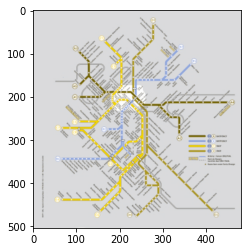

<ipython-input-31-55ab90b62a4b>:15: UserWarning: drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/subway_base_simulated.jpg is a low contrast image
  result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/subway_base_simulated.jpg', _RGB)


In [31]:
from PIL import Image

sRGB = np.asarray(subway_img[:,:,0:3], dtype=float)
lRGB = srgb2lrgb(sRGB)
lRGB255 = float2int(lRGB)
_lRGB = CVD_filter(lRGB255, protan_100)
_lRGB10 = int2float(_lRGB)

_sRGB = lrgb2srgb(_lRGB10)
_RGB = float2int(_sRGB)

plt.imshow(_RGB)
plt.show()

result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/subway_base_simulated.jpg', _RGB)

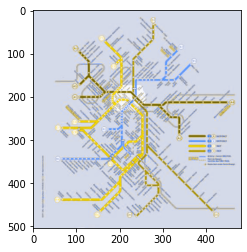

<ipython-input-30-fcbe4f77cecf>:15: UserWarning: drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/subway_result_simulated.jpg is a low contrast image
  result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/subway_result_simulated.jpg', _RGB)


In [30]:
from PIL import Image

sRGB = np.asarray(subway_img_sim[:,:,0:3], dtype=float)
lRGB = srgb2lrgb(sRGB)
lRGB255 = float2int(lRGB)
_lRGB = CVD_filter(lRGB255, protan_100)
_lRGB10 = int2float(_lRGB)

_sRGB = lrgb2srgb(_lRGB10)
_RGB = float2int(_sRGB)

plt.imshow(_RGB)
plt.show()

result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/subway_result_simulated.jpg', _RGB)

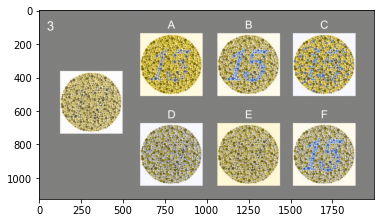

<ipython-input-34-bd6866c60d01>:18: UserWarning: drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/slide_3_simulated.png is a low contrast image
  result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/slide_3_simulated.png', _RGB)


In [34]:
from PIL import Image

slide_3_link = 'drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Citra_CVD_Slide_3.png'
slide_3_img = io.imread(slide_3_link)

sRGB = np.asarray(slide_3_img[:,:,0:3], dtype=float)
lRGB = srgb2lrgb(sRGB)
lRGB255 = float2int(lRGB)
_lRGB = CVD_filter(lRGB255, protan_100)
_lRGB10 = int2float(_lRGB)

_sRGB = lrgb2srgb(_lRGB10)
_RGB = float2int(_sRGB)

plt.imshow(_RGB)
plt.show()

result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/slide_3_simulated.png', _RGB)

In [3]:
from skimage import color, io, util, exposure
from skimage import filters, morphology
from skimage.transform import rescale
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


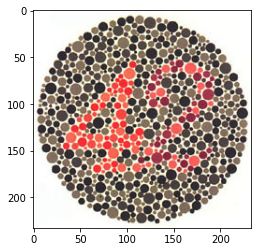

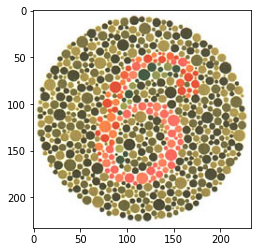

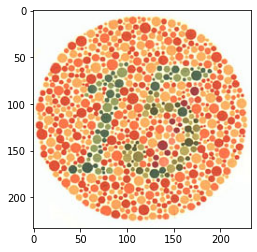

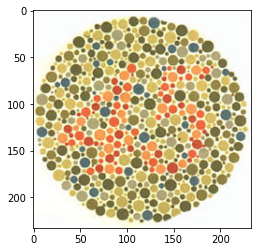

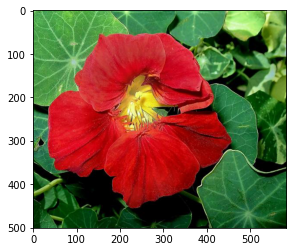

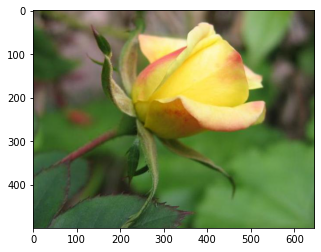

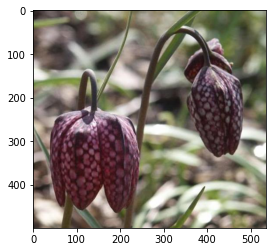

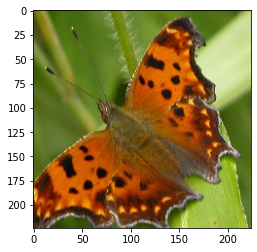

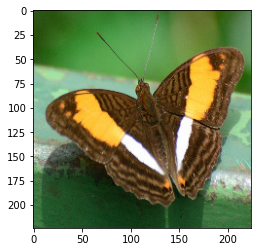

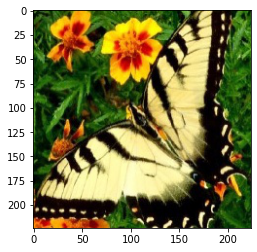

In [4]:
universal_link = 'drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_original'

img_links = []
for i in range(10):
    img_link = universal_link + '/img_0' + str(i) + '.jpg'
    img_links.append(img_link)

images = []
for i in range(10):
    images.append(io.imread(img_links[i]))
    plt.imshow(images[i])
    plt.show()

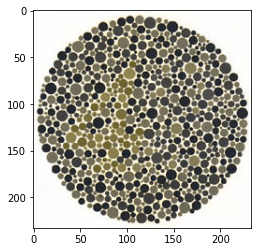

<ipython-input-11-a4f10ceb8e2d>:15: UserWarning: drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/0.jpg is a low contrast image
  result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/' + str(counter) + '.jpg', _RGB)


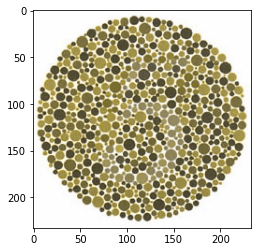

<ipython-input-11-a4f10ceb8e2d>:15: UserWarning: drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/1.jpg is a low contrast image
  result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/' + str(counter) + '.jpg', _RGB)


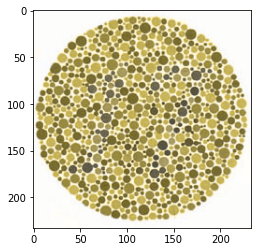

<ipython-input-11-a4f10ceb8e2d>:15: UserWarning: drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/2.jpg is a low contrast image
  result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/' + str(counter) + '.jpg', _RGB)


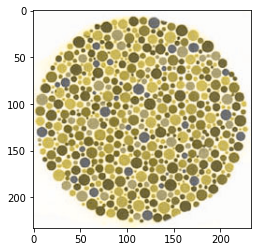

<ipython-input-11-a4f10ceb8e2d>:15: UserWarning: drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/3.jpg is a low contrast image
  result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/' + str(counter) + '.jpg', _RGB)


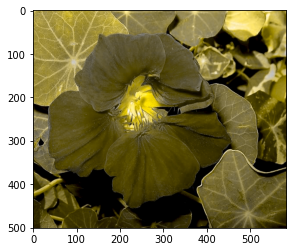

<ipython-input-11-a4f10ceb8e2d>:15: UserWarning: drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/4.jpg is a low contrast image
  result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/' + str(counter) + '.jpg', _RGB)


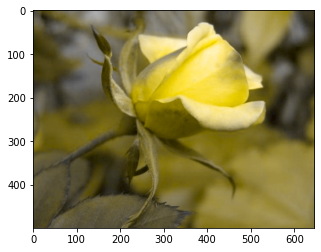

<ipython-input-11-a4f10ceb8e2d>:15: UserWarning: drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/5.jpg is a low contrast image
  result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/' + str(counter) + '.jpg', _RGB)


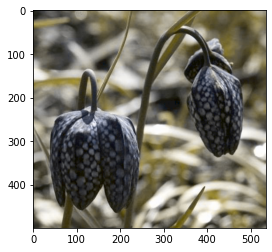

<ipython-input-11-a4f10ceb8e2d>:15: UserWarning: drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/6.jpg is a low contrast image
  result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/' + str(counter) + '.jpg', _RGB)


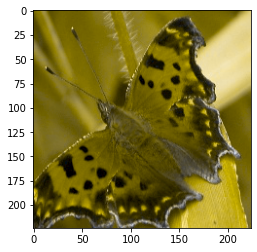

<ipython-input-11-a4f10ceb8e2d>:15: UserWarning: drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/7.jpg is a low contrast image
  result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/' + str(counter) + '.jpg', _RGB)


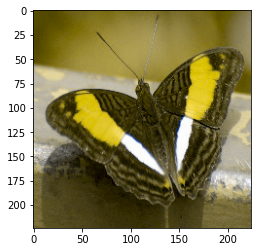

<ipython-input-11-a4f10ceb8e2d>:15: UserWarning: drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/8.jpg is a low contrast image
  result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/' + str(counter) + '.jpg', _RGB)


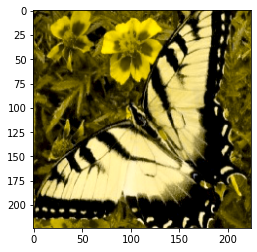

<ipython-input-11-a4f10ceb8e2d>:15: UserWarning: drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/9.jpg is a low contrast image
  result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/' + str(counter) + '.jpg', _RGB)


In [11]:
counter = 0
for img in images:
    sRGB = np.asarray(img[:,:,0:3], dtype=float)
    lRGB = srgb2lrgb(sRGB)
    lRGB255 = float2int(lRGB)
    _lRGB = CVD_filter(lRGB255, protan_100)
    _lRGB10 = int2float(_lRGB)

    _sRGB = lrgb2srgb(_lRGB10)
    _RGB = float2int(_sRGB)

    plt.imshow(_RGB)
    plt.show()

    result_link = io.imsave('drive/MyDrive/[Bimbingan] S1 LR/~2122Genap Naufal Tanansyah CVD Enhancement/Dataset/Images_final_simulated/' + str(counter) + '.jpg', _RGB)
    counter += 1